# Malaria Disease

Malaria is caused by parasites that enter your body through the bite of an infected mosquito. This sometimes fatal disease happens in hot and humid places, like Africa.

Malaria is a serious disease that spreads when you’re bitten by a mosquito infected by tiny parasites. When it bites, the mosquito injects malaria parasites into your bloodstream. Malaria is caused by the parasites, not by a virus or by a type of bacterium.

If it isn’t treated, malaria can cause severe health problems such as seizures, brain damage, trouble breathing, organ failure and death.

The disease is rare in the U.S., with about 2,000 cases per year. If you’re traveling to an area where malaria is common, talk to your healthcare provider about ways you can prevent being infected. People who are infected and travel to the U.S. can spread the disease if a mosquito bites them and then bites someone else.

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dropout,Dense
from tensorflow.keras.applications import VGG16,VGG19
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pathlib
import pickle

# Abount Dataset

**Content**

The dataset contains 2 folders
1) Infected
2) Uninfected

And a total of 27,558 images.

# Import Data

In [2]:
dirr=pathlib.Path("cell_images")

In [3]:
disease_data={
    'Parasitized':list(dirr.glob("Parasitized/*")),
    'Uninfected':list(dirr.glob("Uninfected/*"))
}
Target_names={
    "Parasitized":1,
    "Uninfected":0
}

In [4]:
Data=[]
Target=[]
for name,images in disease_data.items():
    for img in images:
        arr=cv2.imread(str(img))
        resize=cv2.resize(arr,(130,130))
        Data.append(resize)
        Target.append(Target_names[name])
Data=np.array(Data)
Target=np.array(Target)

Text(0.5, 1.0, '1')

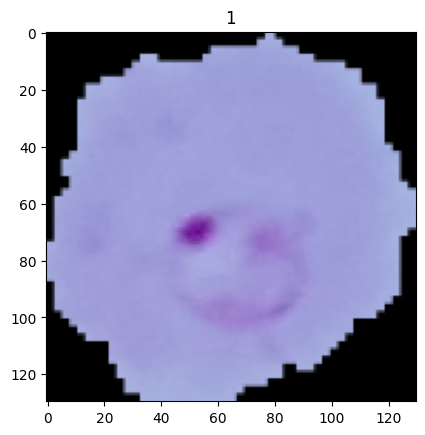

In [5]:
plt.imshow(Data[0])
plt.title(Target[0])

# Spliting the Data for Trianing and Testing

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(Data,Target,test_size=0.2)

# Transfer Learning Model VGG16

In [7]:
vgg16=VGG19(weights='imagenet',include_top=False,input_shape=(130,130,3))
for layer in vgg16.layers:
    layer.trainable=False
model_vgg16=keras.Sequential()
model_vgg16.add(vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512,activation='relu'))
model_vgg16.add(Dropout(0.2))
model_vgg16.add(Dense(128,activation='relu'))
model_vgg16.add(Dropout(0.2))
model_vgg16.add(Dense(128,activation='relu'))
model_vgg16.add(Dropout(0.2))
model_vgg16.add(Dense(1,activation='sigmoid'))
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [9]:
model_vgg16.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the Model

In [10]:
history=model_vgg16.fit(xtrain,ytrain,validation_split=0.2,epochs=10)

Epoch 1/10
552/552 [==============================] - 703s 1s/step - loss: 0.6246 - accuracy: 0.8703 - val_loss: 0.1841 - val_accuracy: 0.9347
Epoch 2/10
552/552 [==============================] - 702s 1s/step - loss: 0.2142 - accuracy: 0.9249 - val_loss: 0.2046 - val_accuracy: 0.9254
Epoch 3/10
552/552 [==============================] - 681s 1s/step - loss: 0.1864 - accuracy: 0.9345 - val_loss: 0.2043 - val_accuracy: 0.9302
Epoch 4/10
552/552 [==============================] - 688s 1s/step - loss: 0.1612 - accuracy: 0.9440 - val_loss: 0.1570 - val_accuracy: 0.9424
Epoch 5/10
552/552 [==============================] - 722s 1s/step - loss: 0.1465 - accuracy: 0.9486 - val_loss: 0.1552 - val_accuracy: 0.9395
Epoch 6/10
552/552 [==============================] - 686s 1s/step - loss: 0.1257 - accuracy: 0.9536 - val_loss: 0.1637 - val_accuracy: 0.9420
Epoch 7/10
552/552 [==============================] - 684s 1s/step - loss: 0.1200 - accuracy: 0.9568 - val_loss: 0.1477 - val_accuracy: 0.9460

In [11]:
loss,accuracy=model_vgg16.evaluate(xtest,ytest)

173/173 [==============================] - 190s 1s/step - loss: 0.1621 - accuracy: 0.9472


# Accuracy and Loss

In [12]:
print(f"Accuracy is {np.round(accuracy*100,2)} %\nLoss is {np.round(loss,2)} %")

Accuracy is 94.72 %
Loss is 0.16 %


In [13]:
yp=model_vgg16.predict(xtest)

173/173 [==============================] - 189s 1s/step


In [14]:
predict_output=[]
for i in yp:
    predict_output.append(int(np.round(i)))

In [15]:
predict_output=np.array(predict_output)
predict_output.flatten()

array([1, 1, 1, ..., 1, 0, 1])

In [16]:
predict_output

array([1, 1, 1, ..., 1, 0, 1])

In [17]:
cm=confusion_matrix(ytest,predict_output)

# Classification Report

In [18]:
cm=classification_report(ytest,predict_output)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2768
           1       0.96      0.94      0.95      2744

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



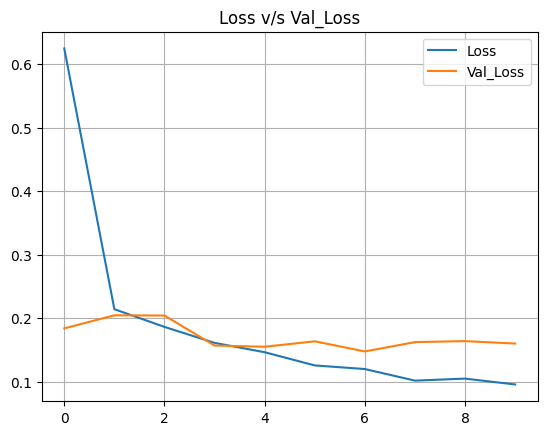

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss v/s Val_Loss")
plt.legend(["Loss","Val_Loss"],loc='best')
plt.grid()
plt.show()

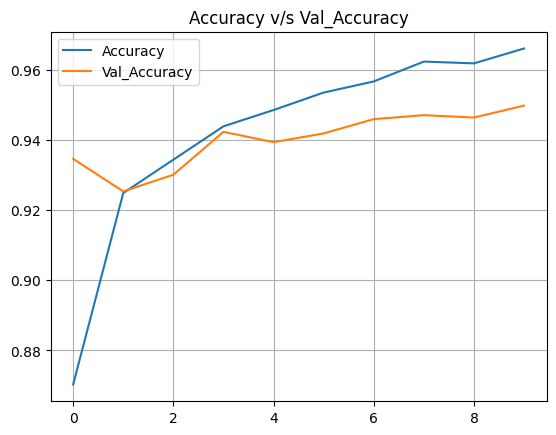

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy v/s Val_Accuracy")
plt.legend(["Accuracy","Val_Accuracy"],loc='best')
plt.grid()
plt.show()

# Saving the Model

In [22]:
pickle.dump(model_vgg16,open("malaria_Disease.pkl","wb"))